In [2]:
# Download the dataset from Kaggle
import os
import zipfile

download = 'customer-shopping-latest-trends-dataset.zip'
unzipped = 'customer-shopping-latest-trends-dataset'

if not os.path.exists(download):
  !kaggle datasets download bhadramohit/customer-shopping-latest-trends-dataset

  # Unzip the dataset
  if not os.path.exists(unzipped):
    with zipfile.ZipFile(dataset, 'r') as zip_ref:
      zip_ref.extractall(unzipped)
  else:
    print('Dataset already unzipped')
else:
  print('Dataset already downloaded')



Dataset already downloaded


In [3]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

shopping_data = pd.read_csv('customer-shopping-latest-trends-dataset/shopping_trends.csv')
print(shopping_data.head())


   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

<h1>Comparing age group and average purchase amount</h1>

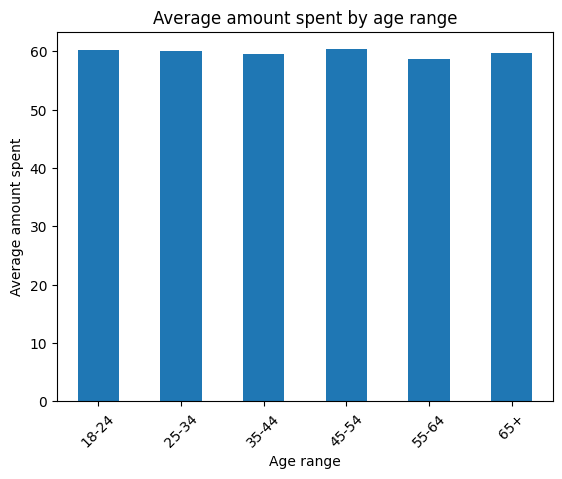

In [8]:
# Add a list of age ranges
age_ranges = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Function to map age to age range
def map_age_to_range(age):
  if age < 18:
    return age_ranges[0]
  elif age < 25:
    return age_ranges[1]
  elif age < 35:
    return age_ranges[2]
  elif age < 45:
    return age_ranges[3]
  elif age < 55:
    return age_ranges[4]
  elif age < 65:
    return age_ranges[5]
  else:
    return age_ranges[6]
  
# Apply the function to the age column
shopping_data['age_range'] = shopping_data['Age'].apply(map_age_to_range)

# Sort the data by age range
shopping_data_sorted = shopping_data.sort_values(by='age_range')

# Create a bar plot of the age ranges and the average amount of previous purchases
shopping_data_sorted.groupby('age_range')['Purchase Amount (USD)'].mean().plot(kind='bar')
plt.title('Average amount spent by age range')
plt.ylabel('Average amount spent')
plt.xlabel('Age range')
plt.xticks(rotation=45)
plt.show()

<h1>Most purchased category</h1>

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x122a3b64c70>,
 [Text(0.18781250770230096, 1.0838479883962386, 'Clothing'),
  Text(-0.8718788619763391, -0.6706916206714112, 'Accessories'),
  Text(0.5901575242400307, -0.9282855684447959, 'Footwear'),
  Text(1.0627474268695036, -0.2838448637587956, 'Outerwear')],
 [Text(0.10244318601943687, 0.5911898118524938, '44.5%'),
  Text(-0.4755702883507304, -0.36583179309349695, '31.8%'),
  Text(0.32190410413092574, -0.5063375827880704, '15.4%'),
  Text(0.5796804146560928, -0.1548244711411612, '8.3%')])

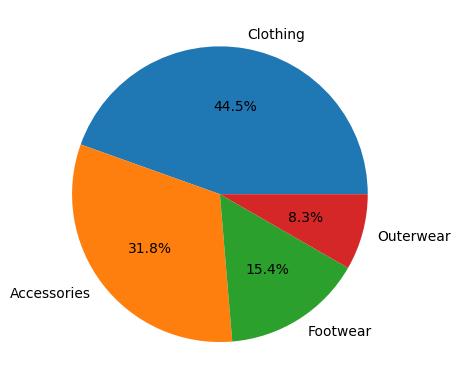

In [9]:
most_purchased_category = shopping_data['Category'].value_counts()
print(most_purchased_category)

# Create a pie chart of the most purchased categories
plt.pie(most_purchased_category, labels=most_purchased_category.index, autopct='%1.1f%%')